In [1]:
%load_ext watermark
%watermark -a 'Hugo' -d -v -m -p numpy,pandas,matplotlib,tensorflow

Hugo 2017-11-27 

CPython 3.6.2
IPython 6.1.0

numpy 1.13.3
pandas 0.20.3
matplotlib 2.1.0
tensorflow 1.3.0

compiler   : GCC 4.2.1 (Apple Inc. build 5666) (dot 3)
system     : Darwin
release    : 17.2.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [36]:
# 造一些带噪音的随机数
w_train = random.randint(1, 10)
b_train = random.randint(0, 100)

print("w: %d\tb: %d"%(w_train, b_train))

w: 2	b: 52


In [37]:
# 得到训练集，y = w* x + b
size = 100
x_train = np.arange(size)
y_train = x_train*w_train + b_train + np.random.normal(loc=0.0, scale=10.0, size=size)

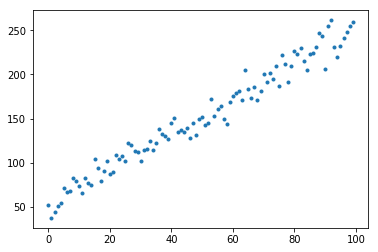

In [38]:
# 绘制图形
plt.plot(x_train, y_train, '.')

In [39]:
# 定义 x, y 的 placeholder
x = tf.placeholder(tf.float32, shape=(None))
y = tf.placeholder(tf.float32, shape=(None))

In [40]:
# 定义 w, b 的 variable
w = tf.Variable(tf.constant(1.0), name='w')
b = tf.Variable(tf.constant(0.0), name='b')

In [41]:
# 定义前馈传播算法
y_ = x * w + b

In [42]:
# 定义损失函数
cost = tf.reduce_mean(tf.square(y_ - y))

In [43]:
# 定义梯度下降优化器
train_step = tf.train.AdamOptimizer(0.01).minimize(cost)

epoch: 0	cost: 4304.817
epoch: 50	cost: 395.897
epoch: 100	cost: 184.789
epoch: 150	cost: 123.552
epoch: 200	cost: 118.299
epoch: 250	cost: 114.294
epoch: 300	cost: 116.245
epoch: 350	cost: 114.195
epoch: 400	cost: 114.014
epoch: 450	cost: 126.645
[2.0013154, 53.521324]


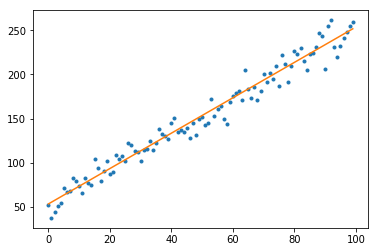

In [46]:
# 建立会话
# 对数据集进行 shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    arr = np.arange(size)
    for i in range(300):
        np.random.shuffle(arr)
        for j in range(100):
            index = arr[j] # 得到一个随机的 index，然后进行训练
            sess.run(train_step, feed_dict={x: x_train.astype(float)[index], y: y_train.astype(float)[index]})
            costs = sess.run(cost, feed_dict=feed_dict)
        if i % 50 == 0:
            print("epoch: {:d}\tcost: {:.3f}".format(i, costs))
    print(sess.run([w, b]))
    plt.plot(x_train, y_train, '.')
    plt.plot(x_train, sess.run(w)*x_train + sess.run(b))

epoch: 0	cost: 3107.820
epoch: 50	cost: 256.900
epoch: 100	cost: 117.969
epoch: 150	cost: 145.192
epoch: 200	cost: 114.846
epoch: 250	cost: 131.416
[1.957459, 53.487934]


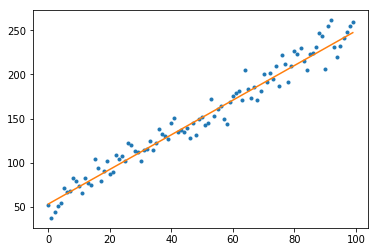

In [51]:
# Mini-batch Gradient Descent
# 关键是 batch_index

batch = 10
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    arr = np.arange(len(x_train))
    for i in range(300):
        np.random.shuffle(arr)
        feed_dict = {x: x_train, y: y_train}
        for j in range(100):
            batch_index = arr[j: j+batch] 
            batch_input = x_train[batch_index]
            batch_labels = y_train[batch_index]
            batch_feed = {x: batch_input, y: batch_labels}
            sess.run(train_step, feed_dict=batch_feed)
        if i % 50 == 0:
            costs = sess.run(cost, feed_dict=feed_dict)
            print("epoch: {:d}\tcost: {:.3f}".format(i, costs))
    print(sess.run([w, b]))
    plt.plot(x_train, y_train, '.')
    plt.plot(x_train, sess.run(w)*x_train + sess.run(b))